In [1]:
# Import libraries necessary for this project
# 载入此分析所需要的库
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

#import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

# 载入offline_train数据
offline_train = pd.read_csv('ccf_offline_stage1_train.csv')
print '该数据为用户线下消费和优惠券领取行为数据,作为训练数据1\n'

#判断是否重复
IsDuplicated = offline_train.duplicated()
print '数据重复：\n',IsDuplicated.value_counts()
print '\n排重前数据：',offline_train.shape

#按全列去重
#offline_train = offline_train.drop_duplicates(subset=None, keep='first', inplace=False)
print '排重后数据：',offline_train.shape
    
# Success
# 完成，打印数据规模
print "\noffline_train dataset has {} data points with {} variables each.".format(*offline_train.shape)

#打印前五条数据
display(offline_train.head(n=10))

该数据为用户线下消费和优惠券领取行为数据,作为训练数据1

数据重复：
False    1716991
True       37893
dtype: int64

排重前数据： (1754884, 7)
排重后数据： (1754884, 7)

offline_train dataset has 1754884 data points with 7 variables each.


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,null,null,0,null,20160217
1,1439408,4663,11002,150:20,1,20160528,null
2,1439408,2632,8591,20:1,0,20160217,null
3,1439408,2632,1078,20:1,0,20160319,null
4,1439408,2632,8591,20:1,0,20160613,null
5,1439408,2632,null,null,0,null,20160516
6,1439408,2632,8591,20:1,0,20160516,20160613
7,1832624,3381,7610,200:20,0,20160429,null
8,2029232,3381,11951,200:20,1,20160129,null
9,2029232,450,1532,30:5,0,20160530,null


In [2]:
# 载入online_train数据
online_train = pd.read_csv('ccf_online_stage1_train.csv')
print '该数据为用户线上点击/消费和优惠券领取行为数据,作为训练数据2\n'

#判断是否重复
IsDuplicated = online_train.duplicated()
print '数据重复：\n',IsDuplicated.value_counts()
print '\n排重前数据：',online_train.shape

#按全列去重
#online_train = online_train.drop_duplicates(subset=None, keep='first', inplace=False)
print '排重后数据：',online_train.shape
    
# Success
# 完成，打印数据规模
print "\nonline_train dataset has {} data points with {} variables each.".format(*online_train.shape)

#打印前五条数据
display(online_train.head(n=10))

该数据为用户线上点击/消费和优惠券领取行为数据,作为训练数据2

数据重复：
False    5822543
True     5607283
dtype: int64

排重前数据： (11429826, 7)
排重后数据： (11429826, 7)

online_train dataset has 11429826 data points with 7 variables each.


,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513,null
1,13740231,34805,1,null,null,null,20160321
2,14336199,18907,0,null,null,null,20160618
3,14336199,18907,0,null,null,null,20160618
4,14336199,18907,0,null,null,null,20160618
5,14336199,18907,0,null,null,null,20160618
6,14336199,18907,0,null,null,null,20160618
7,14336199,18907,0,null,null,null,20160618
8,14336199,18907,0,null,null,null,20160618
9,14336199,18907,0,null,null,null,20160618


In [3]:
# 载入offline_test数据
offline_test = pd.read_csv('ccf_offline_stage1_test_revised.csv')
print '该数据为用户用户O2O线下优惠券使用预测样本,作为测试数据\n'

#判断是否重复
IsDuplicated = offline_test.duplicated()
print '数据重复：\n',IsDuplicated.value_counts()
print '\n排重前数据：',offline_test.shape

#按全列去重
#online_train = online_train.drop_duplicates(subset=None, keep='first', inplace=False)
print '排重后数据：',offline_test.shape
    
# Success
# 完成，打印数据规模
print "\noffline_test dataset has {} data points with {} variables each.".format(*offline_test.shape)

#打印前五条数据
display(offline_test.head(n=10))

该数据为用户用户O2O线下优惠券使用预测样本,作为测试数据

数据重复：
False    112803
True        837
dtype: int64

排重前数据： (113640, 6)
排重后数据： (113640, 6)

offline_test dataset has 113640 data points with 6 variables each.


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1,20160712
1,6949378,1300,3429,30:5,null,20160706
2,2166529,7113,6928,200:20,5,20160727
3,2166529,7113,1808,100:10,5,20160727
4,6172162,7605,6500,30:1,2,20160708
5,4005121,450,9983,30:5,0,20160706
6,4347394,450,9983,30:5,0,20160716
7,3094273,760,13602,30:5,1,20160727
8,5139970,450,9983,30:5,10,20160729
9,3237121,760,13602,30:5,1,20160703


In [4]:
#处理数据，获得分类指标
#oneline
import re
Date_received = pd.to_datetime(offline_train.Date_received,format='%Y%m%d',errors='coerce')
Date = pd.to_datetime(offline_train.Date,format='%Y%m%d',errors='coerce')
Time_difference = Date-Date_received
days_15 = pd.Timedelta('15 days')

def isin_15(timedelta):
    if timedelta <= days_15:
        return 1
    else:
        return 0
    
offline_outcome = Time_difference.map(isin_15)
offline_outcome.value_counts()

0    1690489
1      64395
dtype: int64

In [5]:
display(offline_train.head(n=10))

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,null,null,0,null,20160217
1,1439408,4663,11002,150:20,1,20160528,null
2,1439408,2632,8591,20:1,0,20160217,null
3,1439408,2632,1078,20:1,0,20160319,null
4,1439408,2632,8591,20:1,0,20160613,null
5,1439408,2632,null,null,0,null,20160516
6,1439408,2632,8591,20:1,0,20160516,20160613
7,1832624,3381,7610,200:20,0,20160429,null
8,2029232,3381,11951,200:20,1,20160129,null
9,2029232,450,1532,30:5,0,20160530,null


In [6]:
from sklearn import preprocessing
#去掉无意义的Coupon_id
offline_train = offline_train.drop(['Coupon_id'],axis = 1)

# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(offline_train) 
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# 移除下面一行的注释以观察编码的特征名字
print encoded

411 total features after one-hot encoding.
['User_id', 'Merchant_id', 'Discount_rate_0.2', 'Discount_rate_0.5', 'Discount_rate_0.6', 'Discount_rate_0.7', 'Discount_rate_0.75', 'Discount_rate_0.8', 'Discount_rate_0.85', 'Discount_rate_0.9', 'Discount_rate_0.95', 'Discount_rate_100:1', 'Discount_rate_100:10', 'Discount_rate_100:20', 'Discount_rate_100:30', 'Discount_rate_100:5', 'Discount_rate_100:50', 'Discount_rate_10:1', 'Discount_rate_10:5', 'Discount_rate_150:10', 'Discount_rate_150:20', 'Discount_rate_150:30', 'Discount_rate_150:5', 'Discount_rate_150:50', 'Discount_rate_200:10', 'Discount_rate_200:100', 'Discount_rate_200:20', 'Discount_rate_200:30', 'Discount_rate_200:5', 'Discount_rate_200:50', 'Discount_rate_20:1', 'Discount_rate_20:10', 'Discount_rate_20:5', 'Discount_rate_300:10', 'Discount_rate_300:20', 'Discount_rate_300:30', 'Discount_rate_300:50', 'Discount_rate_30:1', 'Discount_rate_30:10', 'Discount_rate_30:20', 'Discount_rate_30:5', 'Discount_rate_50:1', 'Discount_rate

In [7]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, offline_outcome, test_size = 0.2, random_state = 0)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 1403907 samples.
Testing set has 350977 samples.


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

#随机设outcome为1，求准确率
offline_outcome_pred = []
for i in range(1754884):
    offline_outcome_pred.append(1)
    
# TODO： 计算准确率
accuracy = accuracy_score(offline_outcome, offline_outcome_pred)
recall = recall_score(offline_outcome, offline_outcome_pred, average='macro')  

# TODO： 使用上面的公式，并设置beta=0.5计算F-score
fscore = (1+0.5**2)*((accuracy*recall)/(0.5**2*accuracy+recall))

# 打印结果
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.0367, F-score: 0.0450]


In [9]:
from time import time
from sklearn.metrics import fbeta_score, accuracy_score, recall_score
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)




In [10]:
from time import time
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在测试集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO：计算在测试集上的准确率
    results['acc_test'] = accuracy_score(y_test,  predictions_test)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO：计算测试集上的F-score
    results['f_test'] = fbeta_score(y_test,  predictions_test, beta=0.5)
       
    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

DecisionTreeClassifier trained on 17169 samples.
DecisionTreeClassifier trained on 171699 samples.
DecisionTreeClassifier trained on 1716991 samples.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB trained on 17169 samples.
GaussianNB trained on 171699 samples.
GaussianNB trained on 1716991 samples.
MLPClassifier trained on 17169 samples.
MLPClassifier trained on 171699 samples.
MLPClassifier trained on 1716991 samples.


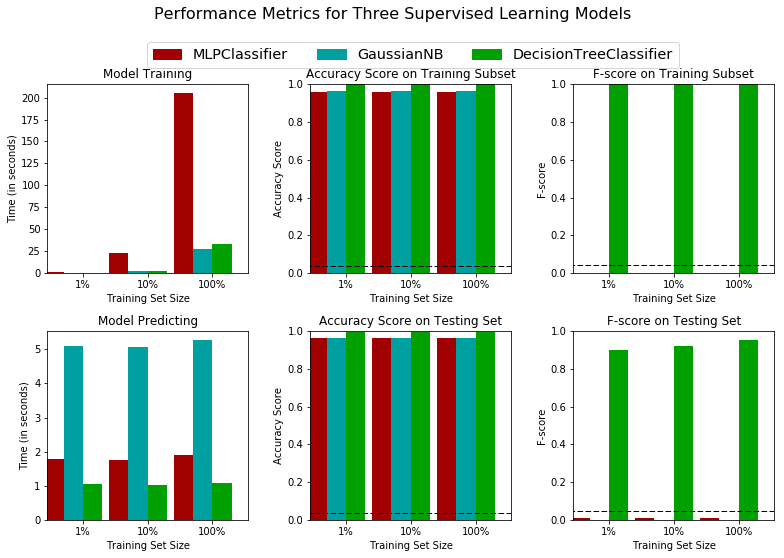

In [11]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# TODO：初始化三个模型
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = GaussianNB()
clf_C = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(1716991*0.01)
samples_10 = int(1716991*0.1)
samples_100 = int(1716991*1)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

#print results

In [12]:
tree = 

SyntaxError: invalid syntax (<ipython-input-12-41a2de5d7930>, line 1)